In [1]:
#https://medium.com/@ledfusion/crypto-portfolio-optimization-with-python-and-tensorflow-an-approach-aa504578c799
import json
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
# GLOBAL

coins = ["ETH", "ETC", "BTC", "TRX", "BTG", "XLM", "XMR"]
#coins = ["ETH", "ETC", "BTC", "TRX", "MKR"]


days_ago_to_fetch = 250  # see also filter_history_by_date()
coin_history = {}
hist_length = 0
average_returns = {}
cumulative_returns = {}

def fetch_all():
  for coin in coins:
    coin_history[coin] = fetch_history(coin)

def fetch_history(coin):
  endpoint_url = "https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym=USD&limit={:d}".format(coin, days_ago_to_fetch)
  res = requests.get(endpoint_url)
  hist = pd.DataFrame(json.loads(res.content)['Data'])
  hist = index_history(hist)
  hist = filter_history_by_date(hist)
  return hist

def index_history(hist):
  # index by date so we can easily filter by a given timeframe
  hist = hist.set_index('time')
  hist.index = pd.to_datetime(hist.index, unit='s')
  return hist

def filter_history_by_date(hist):
  result = hist # customize here
  # result = hist[hist.index.year >= 2017]
  # result = result[result.index.day == 1] # every first of month, etc.
  return result

fetch_all()
hist_length = len(coin_history[coins[0]])

In [33]:
pd.DataFrame(coin_history[coins[0]])

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-08-03,417.62,419.66,397.77,410.83,388810.69,1.587216e+08
2018-08-04,406.91,418.99,401.53,417.62,267593.20,1.097131e+08
2018-08-05,408.81,413.25,400.14,406.91,241712.49,9.813683e+07
2018-08-06,404.95,413.03,401.26,408.78,212984.83,8.661112e+07
2018-08-07,377.94,410.29,368.69,404.95,444215.14,1.750810e+08
2018-08-08,355.57,380.36,347.70,377.94,738339.54,2.682602e+08
2018-08-09,363.51,370.33,350.97,355.57,402432.01,1.455340e+08
2018-08-10,331.57,365.88,326.48,363.51,467033.25,1.629970e+08
2018-08-11,318.01,332.41,305.34,331.56,632391.86,2.009105e+08


In [34]:
# Calculate returns and excess returns

def add_all_returns():
  for coin in coins:
    hist = coin_history[coin]
    hist['return'] = (hist['close'] - hist['open']) / hist['open']
    average = hist["return"].mean()
    average_returns[coin] = average
    cumulative_returns[coin] = (hist["return"] + 1).prod() - 1
    hist['excess_return'] = hist['return'] - average
    coin_history[coin] = hist

add_all_returns()

# display data
print(cumulative_returns)
coin_history['ETH']

{'ETH': -0.5624521950548883, 'ETC': -0.5242974748462039, 'BTC': -0.3016519089096612, 'TRX': -0.009395605281706576, 'BTG': -0.22949899420944064, 'XLM': -0.5171340145509719, 'XMR': -0.42178046116890666}


,close,high,low,open,volumefrom,volumeto,return,excess_return
time,,,,,,,,
2018-08-03,417.62,419.66,397.77,410.83,388810.69,1.587216e+08,0.016528,0.018363
2018-08-04,406.91,418.99,401.53,417.62,267593.20,1.097131e+08,-0.025645,-0.023810
2018-08-05,408.81,413.25,400.14,406.91,241712.49,9.813683e+07,0.004669,0.006505
2018-08-06,404.95,413.03,401.26,408.78,212984.83,8.661112e+07,-0.009369,-0.007534
2018-08-07,377.94,410.29,368.69,404.95,444215.14,1.750810e+08,-0.066700,-0.064864
2018-08-08,355.57,380.36,347.70,377.94,738339.54,2.682602e+08,-0.059189,-0.057354
2018-08-09,363.51,370.33,350.97,355.57,402432.01,1.455340e+08,0.022330,0.024166
2018-08-10,331.57,365.88,326.48,363.51,467033.25,1.629970e+08,-0.087866,-0.086030
2018-08-11,318.01,332.41,305.34,331.56,632391.86,2.009105e+08,-0.040867,-0.039032


In [35]:
# Excess matrix

excess_matrix = np.zeros((hist_length, len(coins)))
pd.DataFrame(excess_matrix).head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
for i in range(0, hist_length):
  for idx, coin in enumerate(coins):
    excess_matrix[i][idx] = coin_history[coin].iloc[i]['excess_return']

# Display

pretty_matrix = pd.DataFrame(excess_matrix, columns = coins)
pretty_matrix.index = coin_history[coins[0]].index

pretty_matrix

,ETH,ETC,BTC,TRX,BTG,XLM,XMR
time,,,,,,,
2018-08-03,0.018363,0.111424,-0.015666,-0.011069,-0.001931,-0.010290,-0.017298
2018-08-04,-0.023810,-0.006950,-0.053014,-0.056174,-0.029712,-0.067177,-0.050453
2018-08-05,0.006505,0.077631,0.004364,0.049374,0.080886,0.013718,0.031678
2018-08-06,-0.007534,0.062059,-0.012871,-0.038301,0.014343,-0.037100,-0.033639
2018-08-07,-0.064864,-0.076938,-0.031170,-0.051755,-0.091786,-0.021522,-0.050199
2018-08-08,-0.057354,-0.122989,-0.064314,-0.125093,-0.090288,-0.132596,-0.120598
2018-08-09,0.024166,-0.005110,0.041951,0.078321,0.045886,0.120662,0.058824
2018-08-10,-0.086030,-0.051758,-0.058706,-0.082010,-0.062860,0.008858,-0.084524
2018-08-11,-0.039032,-0.069523,0.015433,-0.064103,-0.048787,-0.025352,0.016709


In [37]:
# Variance co-variance matrix

product_matrix = np.matmul(excess_matrix.transpose(), excess_matrix)
var_covar_matrix = product_matrix / hist_length

# Display

pretty_matrix = pd.DataFrame(var_covar_matrix, columns=coins, index=coins)

pretty_matrix

,ETH,ETC,BTC,TRX,BTG,XLM,XMR
ETH,0.002883,0.002221,0.001539,0.002280,0.002057,0.002098,0.002335
ETC,0.002221,0.002945,0.001303,0.001897,0.001727,0.001815,0.001978
BTC,0.001539,0.001303,0.001112,0.001306,0.001245,0.001325,0.001473
TRX,0.002280,0.001897,0.001306,0.003107,0.001844,0.001951,0.001989
BTG,0.002057,0.001727,0.001245,0.001844,0.002645,0.001796,0.001899
XLM,0.002098,0.001815,0.001325,0.001951,0.001796,0.002549,0.001961
XMR,0.002335,0.001978,0.001473,0.001989,0.001899,0.001961,0.002620


In [38]:
# Standard Deviation

std_deviations = np.zeros((len(coins), 1))

for idx, coin in enumerate(coins):
  std_deviations[idx][0] = np.std(coin_history[coin]['return'])
  
# Display

pretty_matrix = pd.DataFrame(std_deviations, columns=['Std Dev'], index=coins)

pretty_matrix

,Std Dev
ETH,0.053697
ETC,0.054271
BTC,0.033348
TRX,0.055742
BTG,0.051431
XLM,0.050486
XMR,0.051188


In [39]:
# Std Deviation products matrix

sdev_product_matrix = np.matmul(std_deviations, std_deviations.transpose())


# Display

pretty_matrix = pd.DataFrame(sdev_product_matrix, columns=coins, index=coins)

pretty_matrix

,ETH,ETC,BTC,TRX,BTG,XLM,XMR
ETH,0.002883,0.002914,0.001791,0.002993,0.002762,0.002711,0.002749
ETC,0.002914,0.002945,0.001810,0.003025,0.002791,0.002740,0.002778
BTC,0.001791,0.001810,0.001112,0.001859,0.001715,0.001684,0.001707
TRX,0.002993,0.003025,0.001859,0.003107,0.002867,0.002814,0.002853
BTG,0.002762,0.002791,0.001715,0.002867,0.002645,0.002597,0.002633
XLM,0.002711,0.002740,0.001684,0.002814,0.002597,0.002549,0.002584
XMR,0.002749,0.002778,0.001707,0.002853,0.002633,0.002584,0.002620


In [40]:
# Correlation matrix

correlation_matrix = var_covar_matrix / sdev_product_matrix

# Display

pretty_matrix = pd.DataFrame(correlation_matrix, columns=coins, index=coins)

pretty_matrix

,ETH,ETC,BTC,TRX,BTG,XLM,XMR
ETH,1.000000,0.762300,0.859408,0.761571,0.744786,0.773863,0.849619
ETC,0.762300,1.000000,0.719800,0.627156,0.618710,0.662594,0.712132
BTC,0.859408,0.719800,1.000000,0.702513,0.726104,0.786738,0.862895
TRX,0.761571,0.627156,0.702513,1.000000,0.643170,0.693296,0.696944
BTG,0.744786,0.618710,0.726104,0.643170,1.000000,0.691543,0.721425
XLM,0.773863,0.662594,0.786738,0.693296,0.691543,1.000000,0.758896
XMR,0.849619,0.712132,0.862895,0.696944,0.721425,0.758896,1.000000


In [41]:
# Optimize weights to minimize variance FIRST ONE

def minimize_volatility():

  # Define the model
  # Portfolio Volatility = Sqrt (Transpose (Wt.SD) * Correlation Matrix * Wt. SD)

  coin_weights = tf.Variable(np.full((len(coins), 1), 1.0 / len(coins))) # our variables
  weighted_std_devs = tf.multiply(coin_weights, std_deviations)

  product_1 = tf.transpose(weighted_std_devs)
  product_2 = tf.matmul(product_1, correlation_matrix)
  
  portfolio_variance = tf.matmul(product_2, weighted_std_devs)
  portfolio_volatility = tf.sqrt(tf.reduce_sum(portfolio_variance))


  # Run
  learn_rate = 0.01
  steps = 5000
  
  init = tf.global_variables_initializer()

  # Training using Gradient Descent to minimize variance
  train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(portfolio_volatility)

  with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
      sess.run(train_step)
      if i % 1000 == 0 :
        print("[round {:d}]".format(i))
        print("Weights", coin_weights.eval())
        print("Volatility: {:.2f}%".format(portfolio_volatility.eval() * 100))
        print("")
        
    return coin_weights.eval()

weights = minimize_volatility()

pretty_weights = pd.DataFrame(weights * 100, index = coins, columns = ["Weight %"])
pretty_weights

[round 0]
Weights [[0.14235425]
 [0.14240404]
 [0.14255363]
 [0.14238819]
 [0.14242604]
 [0.14241685]
 [0.14239202]]
Volatility: 4.36%

[round 1000]
Weights [[-0.00030602]
 [-0.00027544]
 [-0.00018288]
 [-0.00028608]
 [-0.00026082]
 [-0.00026659]
 [-0.00028209]]
Volatility: 0.01%

[round 2000]
Weights [[-0.00030601]
 [-0.00027544]
 [-0.00018293]
 [-0.00028608]
 [-0.00026082]
 [-0.00026659]
 [-0.00028207]]
Volatility: 0.01%

[round 3000]
Weights [[-0.00030601]
 [-0.00027544]
 [-0.00018293]
 [-0.00028608]
 [-0.00026082]
 [-0.00026659]
 [-0.00028207]]
Volatility: 0.01%

[round 4000]
Weights [[-0.00030601]
 [-0.00027544]
 [-0.00018293]
 [-0.00028608]
 [-0.00026082]
 [-0.00026659]
 [-0.00028207]]
Volatility: 0.01%



,Weight %
ETH,0.019817
ETC,0.017838
BTC,0.011847
TRX,0.018526
BTG,0.016891
XLM,0.017264
XMR,0.018267


In [12]:
# Optimize weights to minimize variance SECOND ONE

def minimize_volatility():

  # Define the model
  # Portfolio Volatility = Sqrt (Transpose (Wt.SD) * Correlation Matrix * Wt. SD)

  coin_weights = tf.Variable(np.full((len(coins), 1), 1.0 / len(coins))) # our variables
  weighted_std_devs = tf.multiply(coin_weights, std_deviations)

  product_1 = tf.transpose(weighted_std_devs)
  product_2 = tf.matmul(product_1, correlation_matrix)
  
  portfolio_variance = tf.matmul(product_2, weighted_std_devs)
  portfolio_volatility = tf.sqrt(tf.reduce_sum(portfolio_variance))

  # Constraints: sum([0..1, 0..1, ...]) = 1

  lower_than_zero = tf.greater( np.float64(0), coin_weights )
  zero_minimum_op = coin_weights.assign( tf.where (lower_than_zero, tf.zeros_like(coin_weights), coin_weights) )

  greater_than_one = tf.greater( coin_weights, np.float64(1) )
  unity_max_op = coin_weights.assign( tf.where (greater_than_one, tf.ones_like(coin_weights), coin_weights) )

  result_sum = tf.reduce_sum(coin_weights)
  unity_sum_op = coin_weights.assign(tf.divide(coin_weights, result_sum))
  
  constraints_op = tf.group(zero_minimum_op, unity_max_op, unity_sum_op)

  # Run
  learning_rate = 0.01
  steps = 5000
  
  init = tf.global_variables_initializer()

  # Training using Gradient Descent to minimize variance
  optimize_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(portfolio_volatility)

  with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
      sess.run(optimize_op)
      sess.run(constraints_op)
      if i % 2500 == 0 :
        print("[round {:d}]".format(i))
        print("Weights", coin_weights.eval())
        print("Volatility: {:.2f}%".format(portfolio_volatility.eval() * 100))
        print("")
        
    sess.run(constraints_op)
    return coin_weights.eval()

weights = minimize_volatility()

pretty_weights = pd.DataFrame(weights * 100, index = coins, columns = ["Weight %"])
pretty_weights

[round 0]
Weights [[0.49998809]
 [0.50001191]]
Volatility: 3.27%

[round 2500]
Weights [[0.48137745]
 [0.51862255]]
Volatility: 3.27%



,Weight %
ETH,47.472934
MKR,52.527066


In [13]:
# Optimize weights to maximize return/risk SR

import time
start = time.time()

def maximize_sharpe_ratio():
  
  # Define the model
  
  # 1) Variance
  
  coin_weights = tf.Variable(tf.random_uniform((len(coins), 1), dtype=tf.float64)) # our variables
  weighted_std_devs = tf.multiply(coin_weights, std_deviations)
  
  product_1 = tf.transpose(weighted_std_devs)
  product_2 = tf.matmul(product_1, correlation_matrix)
  
  portfolio_variance = tf.matmul(product_2, weighted_std_devs)
  portfolio_volatility = tf.sqrt(tf.reduce_sum(portfolio_variance))

  
  # 2) Return
  
  returns = np.full((len(coins), 1), 0.0) # same as coin_weights
  for coin_idx in range(0, len(coins)):
    returns[coin_idx] = cumulative_returns[coins[coin_idx]]
  
  portfolio_return = tf.reduce_sum(tf.multiply(coin_weights, returns))
  
  # 3) Return / Risk
  
  sharpe_ratio = tf.divide(portfolio_return, portfolio_volatility)
  
  # Constraints
  
  # all values positive, with unity sum
  weights_sum = tf.reduce_sum(coin_weights)
  constraints_op = coin_weights.assign(tf.divide(tf.abs(coin_weights), tf.abs(weights_sum) ))
  
  # Run
  learning_rate = 0.0001
  learning_rate = 0.0015
  steps = 10000
  
  # Training using Gradient Descent to minimize cost
  
  optimize_op = tf.train.GradientDescentOptimizer(learning_rate, use_locking=True).minimize(tf.negative(sharpe_ratio))
  #2# optimize_op = tf.train.AdamOptimizer(learning_rate, use_locking=True).minimize(tf.negative(sharpe_ratio))
  #3# optimize_op = tf.train.AdamOptimizer(learning_rate=0.00005, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False).minimize(tf.negative(sharpe_ratio))
  #4# optimize_op = tf.train.AdagradOptimizer(learning_rate=0.01, initial_accumulator_value=0.1, use_locking=False).minimize(tf.negative(sharpe_ratio))
  
  
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:
    ratios = np.zeros(steps)
    returns = np.zeros(steps)
    sess.run(init)
    for i in range(steps):
      sess.run(optimize_op)
      sess.run(constraints_op)
      ratios[i] = sess.run(sharpe_ratio)
      returns[i] = sess.run(portfolio_return) * 100
      if i % 2000 == 0 : 
        sess.run(constraints_op)
        print("[round {:d}]".format(i))
        #print("Coin weights", sess.run(coin_weights))
        print("Volatility {:.2f} %".format(sess.run(portfolio_volatility)))
        print("Return {:.2f} %".format(sess.run(portfolio_return)*100))
        print("Sharpe ratio", sess.run(sharpe_ratio))
        print("")
    
    sess.run(constraints_op)
    # print("Coin weights", sess.run(coin_weights))
    print("Volatility {:.2f} %".format(sess.run(portfolio_volatility)))
    print("Return {:.2f} %".format(sess.run(portfolio_return)*100))
    print("Sharpe ratio", sess.run(sharpe_ratio))
    return sess.run(coin_weights)

weights = maximize_sharpe_ratio()

print("Took {:f}s to complete".format(time.time() - start))
pretty_weights = pd.DataFrame(weights * 100, index = coins, columns = ["Weight %"])

pretty_weights

[round 0]
Volatility 0.05 %
Return 173.82 %
Sharpe ratio 35.08960019851158

[round 2000]
Volatility 0.05 %
Return 183.64 %
Sharpe ratio 35.213015196883

[round 4000]
Volatility 0.05 %
Return 183.64 %
Sharpe ratio 35.213015196883

[round 6000]
Volatility 0.05 %
Return 183.64 %
Sharpe ratio 35.213015196883

[round 8000]
Volatility 0.05 %
Return 183.64 %
Sharpe ratio 35.213015196883

Volatility 0.05 %
Return 183.64 %
Sharpe ratio 35.213015196883
Took 14.834610s to complete


,Weight %
ETH,0.156277
MKR,99.843723


In [14]:
pretty_weights.columns=['pcg']
pretty_weights.loc['ETH', : ]['pcg']

0.1562766581502851

In [42]:
def get_extremums(d):
    maxv={'col':'empty', 'val':-100}
    minv={'col':'empty', 'val':100}
    
    for rec in d:
        if '_v' in rec:
            if maxv['val']<d[rec]: 
                maxv['col']=rec.replace('_v','')
                maxv['val']=d[rec]
            if minv['val']>d[rec]: 
                minv['col']=rec.replace('_v','')
                minv['val']=d[rec]
    return minv, maxv

def run(threshold):
    ndf = pd.DataFrame()
    for coin in coins:
        ndf =pd.concat([ndf, coin_history[coin]['close']], axis=1, sort=False)
        
    #ndf = pd.concat([
    #           coin_history['ETH']['close'], 
    #           coin_history['ETC']['close'],
    #           coin_history['BTC']['close'], 
    #           coin_history['TRX']['close'],
    #           coin_history['MKR']['close'],
               
               #coin_history['BTG']['close'], 
               #coin_history['XLM']['close'],
               #coin_history['XMR']['close']
    #], axis=1, sort=False)
    ndf.columns = coins
    ndf.head()
    
    for coin in coins:
        ndf[coin+'_chng']=ndf[coin].pct_change()*100
    
    f=ndf.iloc[0]
    #print(f)

    pf={}
    for coin in coins:
        pf[coin]=100
        pf[coin+'c']=100/f[coin]
        
    print(pf)
    pf_orig = dict(pf)

    ch=[]
    #ndf.iat[0,3]=0
    #ndf.iat[0,2]=0
    for i in range(0, len(coins)):
        coin=coins[i]
        print( ndf.iat[0, len(coins)+i])
        ndf.iat[0, len(coins)+i]=0
        print( 'tada', ndf.iloc[0][coin+'_chng'] )
        
    print(ndf.iloc[0])
    n=0
    
    while n < ndf.shape[0]:
        cur = ndf.iloc[n]

        f={'min':100,'max':0,'clmn_max':'','clmn_min':''}

        ch_d = {}
        for coin in coins:
            ch_d[coin+'_v']=pf[coin+'c']*cur[coin]
            ch_d[coin+'_c']=pf[coin+'c']
        ch.append(ch_d)

        vmin, vmax = get_extremums(ch_d)
        diff = abs(vmax['val']-vmin['val'])
        if diff > threshold and vmax['col']!='empty' and vmin['col']!='empty':
            print('pf', pf)
            print('diff', diff)
            print('ch_d', ch_d)

            max_tokens = ( diff/2 ) / cur[vmax['col']]
            min_tokens = ( diff/2 ) / cur[vmin['col']]
            max_qt=cur[vmax['col']]
            min_qt=cur[vmin['col']]
            pf[ vmax['col']+'c' ] = pf[ vmax['col']+'c' ] - max_tokens
            pf[ vmax['col'] ] = pf[ vmax['col']+'c' ] * max_qt

            pf[ vmin['col']+'c' ] = pf[ vmin['col']+'c' ] + min_tokens
            pf[ vmin['col'] ] = pf[ vmin['col']+'c' ] * min_qt


            print(vmin, vmax)
            print('max tokens',max_tokens)
            print('min tokens',min_tokens)

            print('max quote', max_qt)
            print('min quote', min_qt)

            print('max column', vmax['col'])
            print('min column', vmin['col'])
            print(pf)

        #print('=')
        n+=1

    cur = ndf.iloc[ ndf.shape[0]-1 ]
    
    for i in range(0, len(coins)):
        coin=coins[i]
        pf[coin]=cur[coin]*pf[coin+'c']
        
    #pf['ETH']=cur['ETH']*pf['ETHc']
    #pf['ETC']=cur['ETC']*pf['ETCc']
    #
    print(cur)
    print(pf)
    print(len(ch))
    return ch, ndf

In [48]:
ch, ndf = run(5)
chdf=pd.DataFrame(ch)
chdf.describe()

{'ETH': 100, 'ETHc': 0.23945213351850964, 'ETC': 100, 'ETCc': 6.038647342995169, 'BTC': 100, 'BTCc': 0.013481449525452976, 'TRX': 100, 'TRXc': 3221.649484536082, 'BTG': 100, 'BTGc': 4.1459369817578775, 'XLM': 100, 'XLMc': 388.651379712398, 'XMR': 100, 'XMRc': 0.8329862557267805}
nan
tada 0.0
nan
tada 0.0
nan
tada 0.0
nan
tada 0.0
nan
tada 0.0
nan
tada 0.0
nan
tada 0.0
ETH          417.62000
ETC           16.56000
BTC         7417.60000
TRX            0.03104
BTG           24.12000
XLM            0.25730
XMR          120.05000
ETH_chng       0.00000
ETC_chng       0.00000
BTC_chng       0.00000
TRX_chng       0.00000
BTG_chng       0.00000
XLM_chng       0.00000
XMR_chng       0.00000
Name: 2018-08-03 00:00:00, dtype: float64
pf {'ETH': 100, 'ETHc': 0.23945213351850964, 'ETC': 100, 'ETCc': 6.038647342995169, 'BTC': 100, 'BTCc': 0.013481449525452976, 'TRX': 100, 'TRXc': 3221.649484536082, 'BTG': 100, 'BTGc': 4.1459369817578775, 'XLM': 100, 'XLMc': 388.651379712398, 'XMR': 100, 'XMRc': 0.

pf {'ETH': 84.70924088998525, 'ETHc': 0.36619938133315433, 'ETC': 85.22730317687943, 'ETCc': 7.685058897825017, 'BTC': 83.1263354331175, 'BTCc': 0.012376252186093782, 'TRX': 85.0040469607668, 'TRXc': 3567.102264404817, 'BTG': 85.22730317687945, 'BTGc': 3.0767979486238066, 'XLM': 85.0040469607668, 'XLMc': 353.44718071004905, 'XMR': 84.70924088998525, 'XMRc': 0.7394957738104343}
diff 14.364566862188767
ch_d {'ETH_v': 82.63289039782627, 'ETH_c': 0.36619938133315433, 'ETC_v': 83.99769375322742, 'ETC_c': 7.685058897825017, 'BTC_v': 81.69749711823296, 'BTC_c': 0.012376252186093782, 'TRX_v': 96.06206398042173, 'TRX_c': 3567.102264404817, 'BTG_v': 83.22738451027396, 'BTG_c': 3.0767979486238066, 'XLM_v': 86.17042265710995, 'XLM_c': 353.44718071004905, 'XMR_v': 84.13982914415122, 'XMR_c': 0.7394957738104343}
{'col': 'BTC', 'val': 81.69749711823296} {'col': 'TRX', 'val': 96.06206398042173}
max tokens 266.7019469400068
min tokens 0.001088035180399534
max quote 0.02693
min quote 6601.15
max column 

max quote 0.02408
min quote 4.97
max column TRX
min column ETC
{'ETH': 50.167931873620816, 'ETHc': 0.32041854680731185, 'ETC': 49.05751222141485, 'ETCc': 9.870726805113652, 'BTC': 48.58568689701271, 'BTCc': 0.0124616708423885, 'TRX': 49.05751222141485, 'TRXc': 2037.2721022182245, 'BTG': 48.94594529715604, 'BTGc': 3.6912477599665188, 'XLM': 50.167931873620816, 'XLMc': 419.8153294863667, 'XMR': 43.25640944200846, 'XMRc': 0.9709631749047916}
pf {'ETH': 50.167931873620816, 'ETHc': 0.32041854680731185, 'ETC': 49.05751222141485, 'ETCc': 9.870726805113652, 'BTC': 48.58568689701271, 'BTCc': 0.0124616708423885, 'TRX': 49.05751222141485, 'TRXc': 2037.2721022182245, 'BTG': 48.94594529715604, 'BTGc': 3.6912477599665188, 'XLM': 50.167931873620816, 'XLMc': 419.8153294863667, 'XMR': 43.25640944200846, 'XMRc': 0.9709631749047916}
diff 6.081786311752687
ch_d {'ETH_v': 48.41524242258482, 'ETH_c': 0.32041854680731185, 'ETC_v': 49.64975582972167, 'ETC_c': 9.870726805113652, 'BTC_v': 50.354496456381334, 'B

,BTC_c,BTC_v,BTG_c,BTG_v,ETC_c,ETC_v,ETH_c,ETH_v,TRX_c,TRX_v,XLM_c,XLM_v,XMR_c,XMR_v
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.012117,61.096284,3.484687,61.350417,8.798352,60.598908,0.355443,60.750595,2792.116860,61.343590,396.580849,60.966709,0.838705,61.024425
std,0.000601,17.947661,0.485186,18.615638,1.576968,17.973089,0.046272,17.923808,802.958255,17.861741,72.483581,18.549842,0.092238,18.043364
min,0.010967,35.657186,2.385622,32.241971,5.415794,33.354647,0.239452,36.481384,1463.141059,36.491161,290.025035,32.211382,0.649371,33.320978
25%,0.011684,45.359083,3.076798,45.416768,7.272645,44.011629,0.336335,44.474540,1936.730430,45.956374,342.597946,44.881020,0.739496,44.968531
50%,0.012101,50.452823,3.691248,50.613582,9.138259,51.121300,0.359567,51.479974,3022.001031,52.557257,380.662891,52.015119,0.849779,52.121303
75%,0.012462,79.994234,3.865976,80.288289,9.979961,78.646762,0.391854,79.390727,3542.898257,79.605126,441.717289,80.176223,0.899947,79.245803
max,0.014612,100.000000,4.461228,104.933665,11.087278,109.344778,0.434820,100.000000,3886.120315,100.681819,531.093916,100.000000,0.970963,100.000000


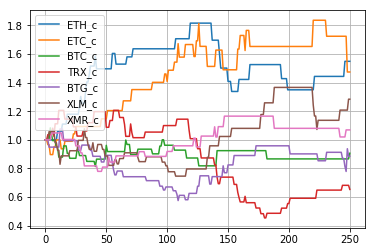

In [49]:
%matplotlib inline

for coin in coins:
    (chdf[coin+'_c']/chdf.loc[0][coin+'_c']).plot(grid=True, legend=True)

#(chdf['BTC_c']/chdf.loc[0]['BTC_c']).plot(grid=True, legend=True)
#(chdf['ETH_c']/chdf.loc[0]['ETH_c']).plot(grid=True, legend=True)
#(chdf['MKR_c']/chdf.loc[0]['MKR_c']).plot(grid=True, legend=True)
#(chdf['TRX_c']/chdf.loc[0]['TRX_c']).plot(grid=True, legend=True)
#(chdf['MKR_c']/chdf.loc[0]['MKR_c']).plot(grid=True, legend=True)

#(chdf['SNM_c']/chdf.loc[0]['SNM_c']).plot(grid=True, legend=True)
#(chdf['XRP_c']/chdf.loc[0]['XRP_c']).plot(grid=True, legend=True)



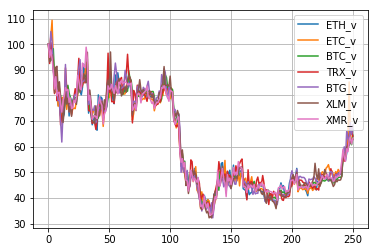

In [50]:
chdf=pd.DataFrame(ch)
for coin in coins:
    (chdf[coin+'_v']).plot(grid=True, legend=True)
#(chdf['ETH_v']).plot(grid=True, legend=True)
#(chdf['MKR_v']).plot(grid=True, legend=True)

#(chdf['BTC_v']).plot(grid=True, legend=True)
#(chdf['TRX_v']).plot(grid=True, legend=True)
#(chdf['MKR_v']).plot(grid=True, legend=True)

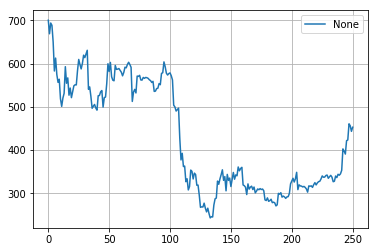

In [51]:
#(chdf['ETH_v']+chdf['ETC_v']+chdf['BTC_v']+chdf['TRX_v']+chdf['MKR_v']).plot(grid=True, legend=True)
#(chdf['ETH_v']+chdf['MKR_v']).plot(grid=True, legend=True)
(chdf['ETH_v']+chdf['ETC_v']+chdf['BTC_v']+chdf['TRX_v']+chdf['BTG_v']+chdf['XLM_v']+chdf['XMR_v']).plot(grid=True, legend=True)


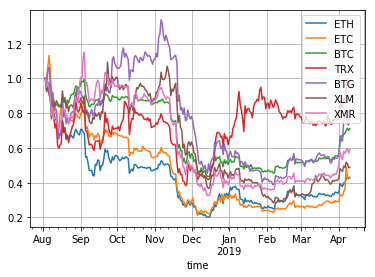

In [52]:
#chdf.head()
for coin in coins:
    (ndf[coin]/ndf.iloc[0][coin]).plot(grid=True, legend=True)
   
#(ndf['BTC']/ndf.iloc[0]['BTC']).plot(grid=True, legend=True)
#(ndf['ETH']/ndf.iloc[0]['ETH']).plot(grid=True, legend=True)
#(ndf['MKR']/ndf.iloc[0]['MKR']).plot(grid=True, legend=True)
#(ndf['TRX']/ndf.iloc[0]['TRX']).plot(grid=True, legend=True)
#(ndf['MKR']/ndf.iloc[0]['MKR']).plot(grid=True, legend=True)


In [53]:
print(pf)

NameError: name 'pf' is not defined